In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
data=pd.read_csv("classification_data9.csv")

In [3]:
def normalize(x):
    X= np.zeros((len(x),2))
    for i in range (len(x)):
        X[i][0]= (x[i][0] - np.mean(column(x, 0)))/ np.sqrt((np.var(column(x, 0))))
        X[i][1]= (x[i][1] - np.mean(column(x, 1)))/ np.sqrt((np.var(column(x, 1))))
    return X

In [4]:
b = np.array(data['x_2'])
a = np.array(data['x_1'])
y=np.array(data['y'])
x= np.zeros((len(y),2))

y_origin=np.zeros(len(y))
for i in range(len(y)):
       y_origin[i]=y[i]
        
for i in range (len(y)):  
    x [i][0]= a[i]
    x[i][1] = b[i]

In [5]:
def noise(y):
    for i in range(len(y)):
        y[i]=y_origin[i]
    d = (len(x)*7)//100
    for j in range(d):
        r = random.randint(0, len(y))
        if (y[r]==1):
            y[r] = -1 
    return y

In [6]:
y=noise(y)

In [7]:
for i in range(len(y)):
    if (y[i]==0):
        y[i] = -1


In [8]:
def split(x,y):
    n =len(y)//2
    trainx = np.zeros((len(y)-n,2))
    #trainx2 = np.zeros(len(y)-n)
    trainy = np.zeros(len(y)-n)
    testx = np.zeros((n,2))
    #testx2 = np.zeros(n)
    testy = np.zeros(n)
    indtrain =0
    indtest =0
    for a in range(len(y)):
        if (a % 2 !=0 ):
            trainx[indtrain][0]=x[a][0]
            trainx[indtrain][1]=x[a][1]
            
            trainy[indtrain]=y[a]
            indtrain=indtrain+1

        else : 
            testx[indtest][0]=x[a][0]
            testx[indtest][1]=x[a][1]
            testy[indtest]=y[a]
            indtest=indtest+1
    
    return trainx,trainy ,testx,  testy

In [9]:
trainx,trainy ,testx,  testy = split(x,y)

In [10]:
def ls(x,y,w):
    cpt=0
    for i in range(len(y)):
        s=w[0];
        for j in range(1,3):
            s=s+w[j]*x[i][j-1]
        if(s*y[i]<0.0):
            cpt=cpt+1
    return cpt/len(y)

In [11]:
def pocket(x,y):
    ws=np.ones(3)
    w=np.ones(3)
    for i in range(1000):
        erreur_old=ls(x,y,ws);
        for j in range(len(y)):
            s=w[0]
            for e in range(1,3):
                s=s+w[e]*x[j][e-1]
                if(s*y[j]<0):
                    w[0]=w[0]+y[j]
                    for z in range(1,3):
                        w[z]=w[z]+x[j][z-1]*y[j]
        erreur=ls(x,y,w);
        if(erreur<erreur_old):
            for k in range(3):
                ws[k]=w[k]
    return w

In [12]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [13]:
w=pocket(trainx,trainy)

In [14]:
ls(testx,testy,w)

0.06666666666666667

In [15]:
def droite(w,x):
    a = (-1/w[2])*(w[0]+w[1]*x)
    return a

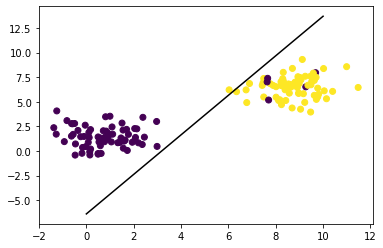

In [16]:

l = np.linspace(-2, 2, 100)
col ={1 :"blue", -1:"red"}
plt.scatter(column(trainx,0), column(trainx,1),c=trainy)
l = np.linspace(0, 10, 100)
plt.plot(l,droite(w,l),color='black')
plt.show()
